In [2]:
import numpy as np
import xarray as xr
import os
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import netCDF4
import matplotlib.colors as colors

In [2]:
data = xr.open_dataset('./data/SCHISM_SNS_surfTSC_hourly_2020n.nc')
type(data)
# print(data)


#change the variable name
data = data.rename({"TSC g per l": "SPM"})

# print(f'data.SPM.values  min {np.nanmin(data.SPM.values)} and max {np.nanmax(data.SPM.values)}' )

print(data)




<xarray.Dataset>
Dimensions:              (time: 7920, lat: 601, lon: 1151)
Coordinates:
  * time                 (time) float64 4.383e+04 4.383e+04 ... 4.416e+04
Dimensions without coordinates: lat, lon
Data variables:
    longitude            (lat, lon) float64 ...
    latitude             (lat, lon) float64 ...
    SPM                  (time, lat, lon) float32 ...
    surf. elevation m    (time, lat, lon) float32 ...
    sign. wave height m  (time, lat, lon) float32 ...
    mask                 (lat, lon) float32 ...
    mud fraction         (lat, lon) float32 ...
    baythmetry           (lat, lon) float32 ...


In [3]:
#crop
# Define longitude and latitude bounds
lon_min, lon_max = 6.37, 9.5
lat_min, lat_max = 52.61, 55.11

# Open your NetCDF file
ds = xr.open_dataset('./data/SCHISM_SNS_surfTSC_hourly_2020n.nc')

# Crop the dataset
cropped_ds = ds.where(
    (ds.longitude >= lon_min) & (ds.longitude <= lon_max) &
    (ds.latitude >= lat_min) & (ds.latitude <= lat_max),
    drop=True
)

# Save the cropped dataset to a new file
cropped_ds.to_netcdf('./data/SCHISM_hourly_cropped.nc')

In [4]:
#process_data_cropped

data = xr.open_dataset('./data/SCHISM_hourly_cropped.nc')
type(data)


#change the variable name
data = data.rename({"TSC g per l": "SPM"})

print(f'data.SPM.values  min {np.nanmin(data.SPM.values)} and max {np.nanmax(data.SPM.values)}' )

print(data)

data.SPM.values  min 0.0 and max 1.8006765842437744
<xarray.Dataset>
Dimensions:              (lat: 240, lon: 300, time: 7920)
Coordinates:
  * time                 (time) float64 4.383e+04 4.383e+04 ... 4.416e+04
Dimensions without coordinates: lat, lon
Data variables:
    longitude            (lat, lon) float64 ...
    latitude             (lat, lon) float64 ...
    SPM                  (time, lat, lon) float32 nan nan nan ... nan nan nan
    surf. elevation m    (time, lat, lon) float32 ...
    sign. wave height m  (time, lat, lon) float32 ...
    mask                 (lat, lon) float32 ...
    mud fraction         (lat, lon) float32 ...
    baythmetry           (lat, lon) float32 ...


In [5]:
#change long and latitude format

# Create new longitude and latitude dimensions
new_lon = np.linspace(np.nanmin(data.longitude.values), np.nanmax(data.longitude.values), 300)  # Replace start_lon and end_lon with your desired range
new_lat = np.linspace(np.nanmin(data.latitude.values), np.nanmax(data.latitude.values), 240)   # Replace start_lat and end_lat with your desired range

# Initialize a new DataArray with the expanded dimensions
# Note: You need to decide how to initialize this array, here I'm using NaNs
new_spm = xr.DataArray(data.SPM, coords=[data['time'], new_lat, new_lon], dims=['time', 'lat', 'lon'])

# Assign this new DataArray to your dataset
data['SPM'] = (new_spm+0.0001)*1000

# Now your dataset should have the desired dimensions and coordinates
print(data)

print(f'data.SPM.values  min {np.nanmin(data.SPM.values)} and max {np.nanmax(data.SPM.values)}' )

<xarray.Dataset>
Dimensions:              (lat: 240, lon: 300, time: 7920)
Coordinates:
  * time                 (time) float64 4.383e+04 4.383e+04 ... 4.416e+04
  * lat                  (lat) float64 52.62 52.63 52.64 ... 55.09 55.1 55.11
  * lon                  (lon) float64 6.38 6.391 6.401 ... 9.474 9.484 9.495
Data variables:
    longitude            (lat, lon) float64 6.38 6.391 6.401 ... 9.484 9.495
    latitude             (lat, lon) float64 52.62 52.62 52.62 ... 55.11 55.11
    SPM                  (time, lat, lon) float32 nan nan nan ... nan nan nan
    surf. elevation m    (time, lat, lon) float32 ...
    sign. wave height m  (time, lat, lon) float32 ...
    mask                 (lat, lon) float32 ...
    mud fraction         (lat, lon) float32 ...
    baythmetry           (lat, lon) float32 ...
data.SPM.values  min 0.09999999403953552 and max 1800.776611328125


In [4]:
# # Transpose only the 'SPM' DataArray within the dataset
# data['SPM'] = data['SPM'].transpose('time', 'lat', 'lon')

# print(data['SPM'])

<xarray.DataArray 'SPM' (time: 330, lat: 601, lon: 1151)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, .

In [6]:
# rescaling data by log10
data['SPM'] = np.log10(data['SPM'])

# Now your dataset should have the desired dimensions and coordinates
print(data)

print(f'data.SPM.values  min {np.nanmin(data.SPM.values)} and max {np.nanmax(data.SPM.values)}' )

<xarray.Dataset>
Dimensions:              (lat: 240, lon: 300, time: 7920)
Coordinates:
  * time                 (time) float64 4.383e+04 4.383e+04 ... 4.416e+04
  * lat                  (lat) float64 52.62 52.63 52.64 ... 55.09 55.1 55.11
  * lon                  (lon) float64 6.38 6.391 6.401 ... 9.474 9.484 9.495
Data variables:
    longitude            (lat, lon) float64 6.38 6.391 6.401 ... 9.484 9.495
    latitude             (lat, lon) float64 52.62 52.62 52.62 ... 55.11 55.11
    SPM                  (time, lat, lon) float32 nan nan nan ... nan nan nan
    surf. elevation m    (time, lat, lon) float32 ...
    sign. wave height m  (time, lat, lon) float32 ...
    mask                 (lat, lon) float32 ...
    mud fraction         (lat, lon) float32 ...
    baythmetry           (lat, lon) float32 ...
data.SPM.values  min -1.0 and max 3.255459785461426


In [1]:
#change date format
import pandas as pd
# Start date is '1-2-2020', and we have 7920 hourly time steps
time_period = pd.date_range('2020-01-02', periods=7920, freq='H')

# Assuming 'data' is your xarray.Dataset
data['time'] = time_period

# Check the updated dataset
print(data)



NameError: name 'data' is not defined

(240, 300)
-1.0 3.254156


/tmp/ipykernel_19073/323856231.py:5: RuntimeWarning: Mean of empty slice
  mean_tgt = np.nanmean(data.SPM, axis=0)#.sel(time='2017')


Text(0.5, 1.0, 'Mean of values')

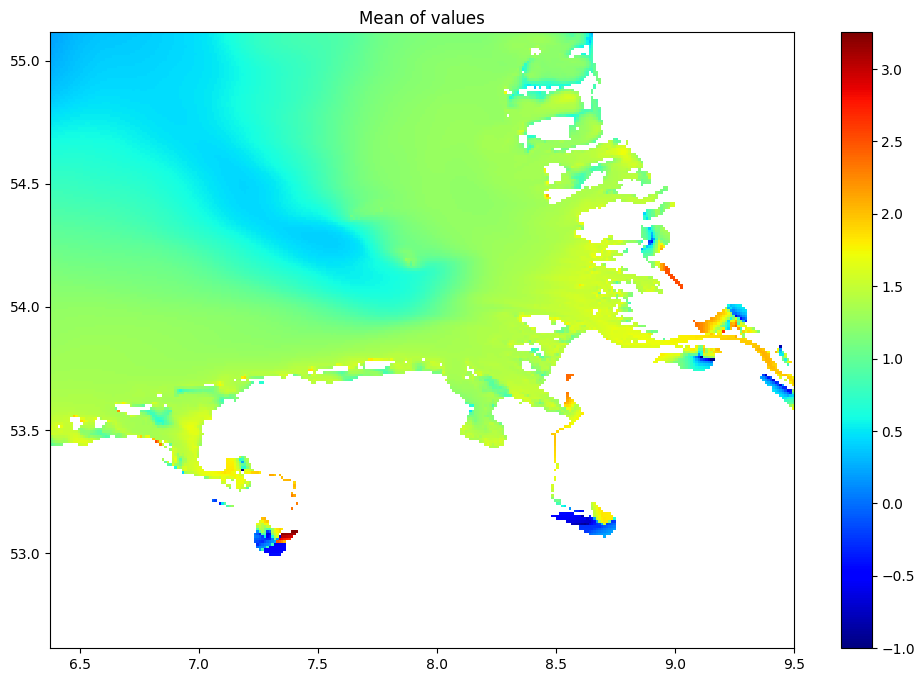

In [8]:
#visualize the mean of the data

nlat = data.lat.size
nlon = data.lon.size
mean_tgt = np.nanmean(data.SPM, axis=0)#.sel(time='2017')

vmin = np.nanmin(mean_tgt)
vmax = np.nanmax(mean_tgt)

print(mean_tgt.shape)
print(vmin,vmax)
fig=plt.figure(figsize=[10+2, 10*(nlat/nlon)])
plt.pcolormesh( data.lon,data.lat, mean_tgt, cmap='jet',vmin=vmin,vmax=vmax)
plt.colorbar()
plt.title('Mean of values')

In [9]:
#: Write the modified dataset to a new NetCDF file

data.to_netcdf('./data/SCHISM_hourly_cropped_log10.nc')
print('np.unique', np.unique(data.SPM.values))

np.unique [-1.         -0.99999994 -0.9999999  ...  3.255453    3.2554598
         nan]


In [3]:
data=xr.open_dataset('./data/SCHISM_hourly_cropped_log10.nc')
print(data.time)

<xarray.DataArray 'time' (time: 7920)>
array(['2020-01-02T00:00:00.000000000', '2020-01-02T01:00:00.000000000',
       '2020-01-02T02:00:00.000000000', ..., '2020-11-26T21:00:00.000000000',
       '2020-11-26T22:00:00.000000000', '2020-11-26T23:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2020-01-02 ... 2020-11-26T23:00:00


In [10]:
########################
##### land mask ########
########################
new_dataset=data
mask = np.where(np.isnan(new_dataset.SPM.values), 0., 1.)
print('mask.shape',mask.shape)
nt = len(new_dataset.time)
print('nt: ', nt)
#print('mask: ', mask)
land_mask = np.float64(np.sum(mask==0,0)==nt)#axis=0 of the numpy.sum, land_mask shape (78,289) contains 0 and 1, 1 only at the place when all time-series x is NOT nan at that pixel
print('land_mask.shape',land_mask.shape)
land_mask[np.where(land_mask==0)] = np.nan
land_mask = xr.DataArray(land_mask,name="mask",coords=[new_dataset.lat,new_dataset.lon],dims=['lat','lon'])
print('land_mask after format as Xarray: ', land_mask)

#this 2 below is just to save the file containing land_mask
land_mask_file = './data/land_mask_SCHISM_Nga.nc'
land_mask.to_netcdf(land_mask_file)

mask.shape (7920, 240, 300)
nt:  7920
land_mask.shape (240, 300)
land_mask after format as Xarray:  <xarray.DataArray 'mask' (lat: 240, lon: 300)>
array([[ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       ...,
       [nan, nan, nan, ...,  1.,  1.,  1.],
       [nan, nan, nan, ...,  1.,  1.,  1.],
       [nan, nan, nan, ...,  1.,  1.,  1.]])
Coordinates:
  * lat      (lat) float64 52.62 52.63 52.64 52.65 ... 55.08 55.09 55.1 55.11
  * lon      (lon) float64 6.38 6.391 6.401 6.411 ... 9.464 9.474 9.484 9.495


In [11]:
#create obs_patches by removed patches 
##########################
#### Patch (from 0 to 50%) Obs. ####
##########################


# ~ lat_min = 52.5
# land_mask = land_mask.values#note that land_mask contains only 0 and 1

lon = new_dataset.lon
lat = new_dataset.lat

n_land_pix = np.nansum(land_mask)# sum of array elements over a given axis treating Not a Numbers (NaNs) as zero.==> number of 1-pixels
n_sea_pix = land_mask.size-n_land_pix# numbe of 0-pixels

np.random.seed(10)
for t in range(new_dataset.time.size):
    mask_patch = np.where(np.isnan(new_dataset.SPM[t].values),np.nan,1)#mask_patch contains only nan and 1, nan at places that SPM values is nan, and 1 otherwise

    #p_mv is the ratio of nan-pixels to sea-pixels, so if it's bigger than 0.75, then we need to cover more sea-pixels with nan-pixels
    p_mv = 1-np.nansum(mask_patch)/n_sea_pix# "np.nansum(mask_patch)/n_sea_pix" Oh, is it a problem here? n_sea_pix is to count #nan in all series, and np.nansum(mask_patch) is to count #NOT nan in the current x_t
    if p_mv <= .75:#i.e, np.nansum(mask_patch)/n_sea_pix bigger than 0.25!! Otherwise, no need to do anything since it is already too small (smaller than 0.25) !!!
        obj_p_mv = 1-.5*(np.nansum(mask_patch)/n_sea_pix)
        while p_mv <= obj_p_mv:
            half_patch_height = np.random.randint(2,10)
            idx_lat = np.random.randint(0,lat.size)
            idx_lon = np.random.randint(0,lon.size)
            mask_patch[np.max([0,idx_lat-half_patch_height]):np.min([lat.size,idx_lat+half_patch_height+1]),np.max([0,idx_lon-half_patch_height]):np.min([lon.size,idx_lon+half_patch_height+1])] = np.nan
            p_mv = 1-np.nansum(mask_patch)/n_sea_pix
                
    new_var = new_dataset.SPM[t].values
    new_var[np.where(np.isnan(mask_patch))] = np.nan

    new_dataset.SPM[t].values = new_var


new_dataset.to_netcdf('./data/Obs_patch_SCHISM_hourly_cropped_log10.nc')

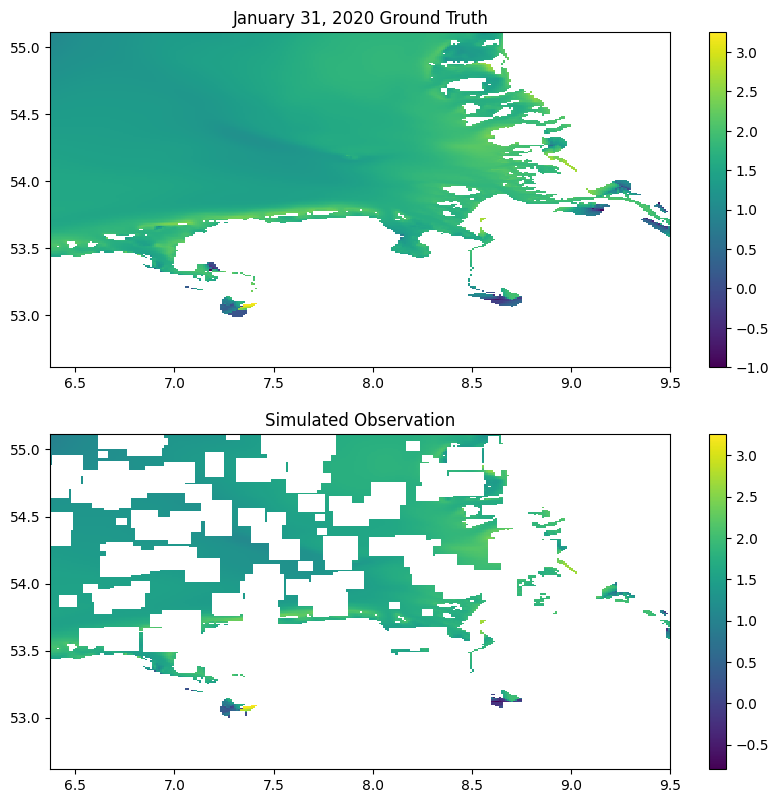

In [59]:
#plot several days only, instead of the animation on whole month
GT = xr.open_dataset('./data/SCHISM_hourly_cropped_log10.nc')

data_month=GT#.sel(time=year)#+"-"+month)
Obs_month=new_dataset#.sel(time=year)#+"-"+month)

fig, (ax0, ax1) = plt.subplots(2, 1, figsize=[2*5, 5*(nlon/nlat)])

t = 29  # Example time index

# Plot for the Ground Truth
mappable0 = ax0.pcolormesh(data_month.lon, data_month.lat, data_month.SPM[t])
ax0.pcolormesh(data_month.lon, data_month.lat, land_mask, cmap='Greys')
ax0.set_title(data_month.time[t].dt.strftime("%B %d, %Y").values + " Ground Truth")
fig.colorbar(mappable0, ax=ax0)  # Create a colorbar for the first subplot

# Plot for the Simulated Observation
mappable1 = ax1.pcolormesh(data_month.lon, data_month.lat, Obs_month.SPM[t])
ax1.pcolormesh(data_month.lon, data_month.lat, land_mask, cmap='Greys')
ax1.set_title("Simulated Observation")
fig.colorbar(mappable1, ax=ax1)  # Create a colorbar for the second subplot

plt.show()  # Display the plot
